In [35]:
%pip install opencv-python
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [36]:
#Importing necessary packages
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [37]:
def detect_and_count_coins(image_path):
    
    image = cv2.imread(image_path)
    if image is None:
        print("Wrong Address for Image.")
        return -1
    
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("CoinOutputs/Gray.png", gray)
    smoothEdge = cv2.GaussianBlur(gray, (5, 5), 0) # Apply Gaussian blur to reduce noise (also is the first step in Canny Edge detection)
    cv2.imwrite("CoinOutputs/GrayGaussian.png", smoothEdge)

    # Perform Canny edge detection
    edges = cv2.Canny(smoothEdge, 50, 150)
    cv2.imwrite("CoinOutputs/CannyEdge.png", edges)

    # Apply morphological closing to close small gaps and then find contours in the edge image
    kernel = np.ones((3, 3), np.uint8)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
    contours, hierarchy = cv2.findContours(closed_edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    
    # Filter contours based on circularity and area
    coin_contours = []
    areas = []
    for contour in contours:
        area = cv2.contourArea(contour)
        areas.append(area)
        if area < 500:  # Adjust based on image size and coin sizes
            continue
 
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue
        
        circularity = (4 * 3.14 * area) / (perimeter ** 2)
        if circularity < 0.7:
            continue
        
        # Additional check using minimum enclosing circle
        (x, y), r = cv2.minEnclosingCircle(contour)
        circle_area = 3.14 * (r ** 2)
        if circle_area == 0:
            continue
        
        area_ratio = area / circle_area
        if area_ratio < 0.7:
            continue
        
        coin_contours.append(contour)
    
    # Draw detected coins on the original image
    cv2.drawContours(image, coin_contours, -1, (0, 255, 0), 2)
    
    # Display the result
    # cv2.imshow('Detected Coins', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Coins')
    plt.show()
    
    # Segment each coin and save/display
    for idx, contour in enumerate(coin_contours):
        # Create a mask for the current coin
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], -1, 255, -1)
        
        # Apply the mask to the original image
        segmented = cv2.bitwise_and(orig, orig, mask=mask)
        
        x, y, w, h = cv2.boundingRect(contour)
        segmented_coin = segmented[y:y+h, x:x+w]

        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(segmented_coin, cv2.COLOR_BGR2RGB))
        plt.title(f'Segmented Coin {idx + 1}')
        plt.show()
    
    return len(coin_contours)


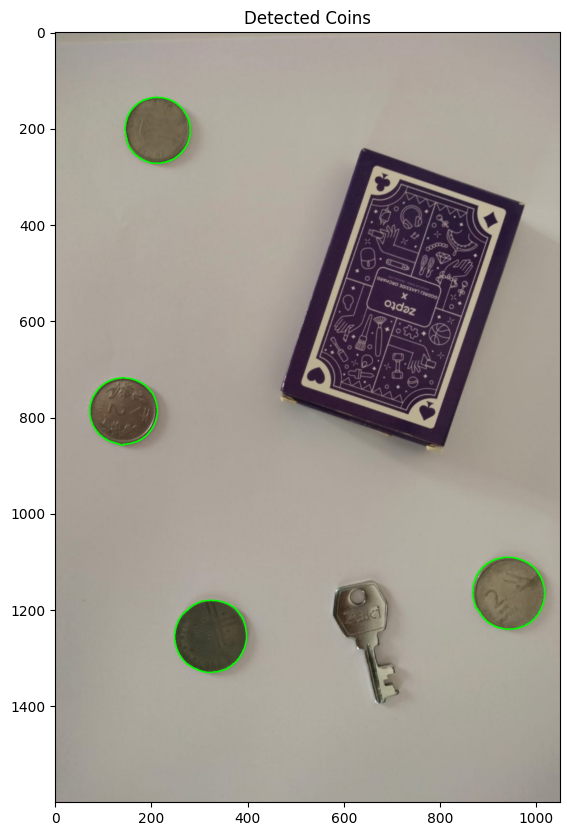

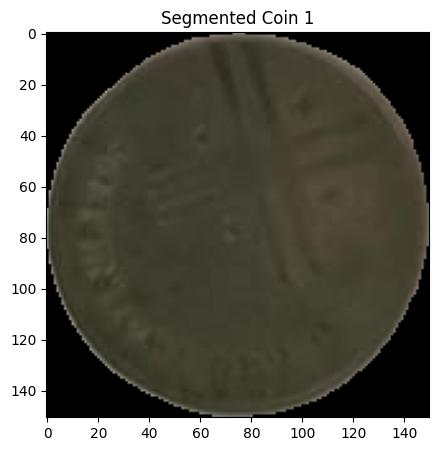

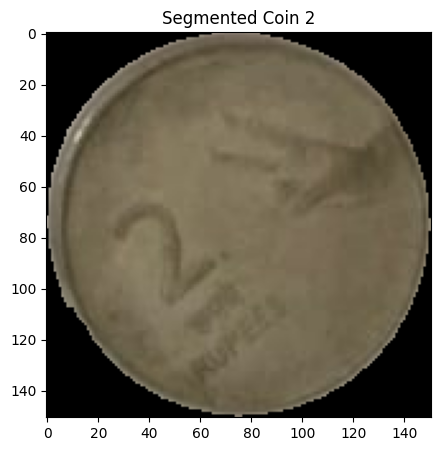

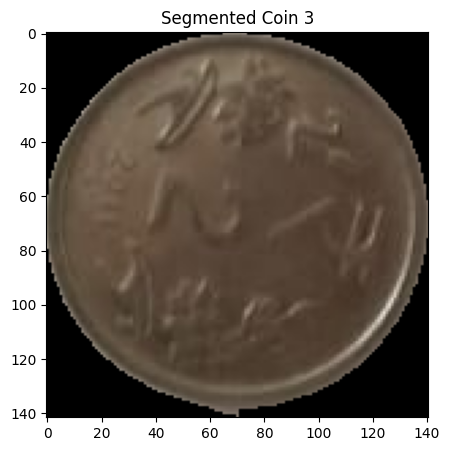

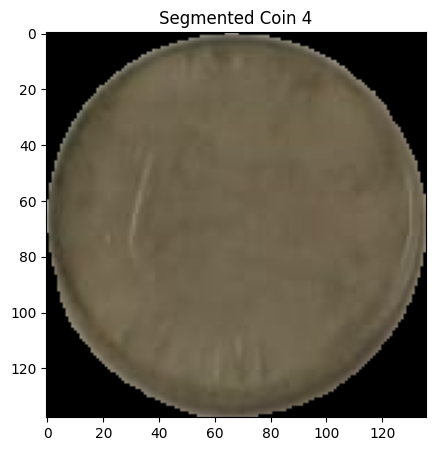

Number of Coins in Image :  4


In [38]:
image_path = 'CoinInputs/Coin2.jpg'
numberOfCoins = detect_and_count_coins(image_path)
if numberOfCoins < 0:
    print("Wrong Address of Image given or some unfateful error occurred. Pls check again.")
else:
    print("Number of Coins in Image : ", numberOfCoins)